# Practical 13

## Aim : Develop a customer segmentation project using machine learning in python and implement the following subparts:-

i) Create customer gender visualization to show gender distribution across the dataset using bar plot and pie chart.<br>
ii) Plot a histogram to visualise the distribution of frequencies of customer ages.<br>
iii) Analyze the annual income of customer by plotting a histogram and a density plot.<br>
iv) Analyze the spending scores of customers and examine the outliers count using a box plot.<br>
v) Use K-means clustering and find optimal number of clusters to segment the dataset on the basis of customer spending score and salaries (annual income).<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Sem 4\AML\Datasets\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
 df.shape

(200, 5)

In [4]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

### Create customer gender visualization to show gender distribution across the dataset using bar plot and pie chart.

<function matplotlib.pyplot.show(close=None, block=None)>

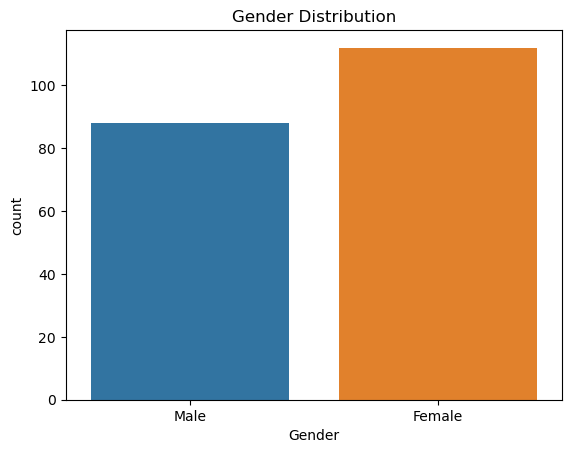

In [5]:
sns.countplot(x=df["Gender"],data=df)
plt.title("Gender Distribution")
plt.show

In [6]:
data = [len(df[df['Gender']=='Male']),len(df[df['Gender']=='Female'])]
label = ['Male','Female']

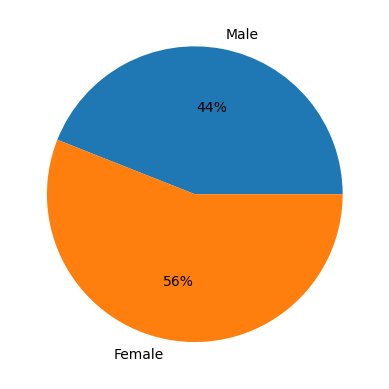

In [7]:
plt.pie(data, labels=label, autopct='%.0f%%')
plt.show()

### Plot a histogram to visualise the distribution of frequencies of customer ages.

<AxesSubplot: xlabel='Age', ylabel='Count'>

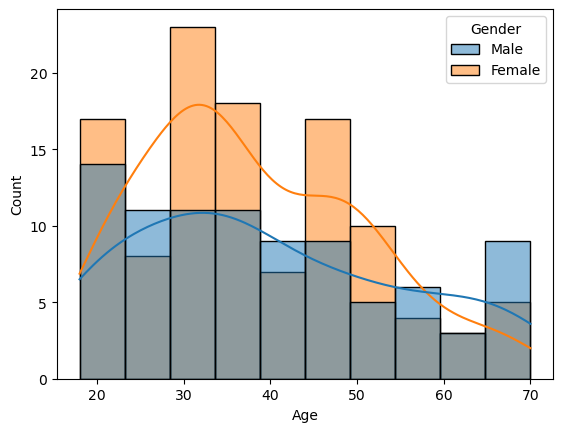

In [8]:
sns.histplot(data=df,x='Age',hue='Gender', kde=True,bins=10)

### Analyze the annual income of customer by plotting a histogram and a density plot.

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Count'>

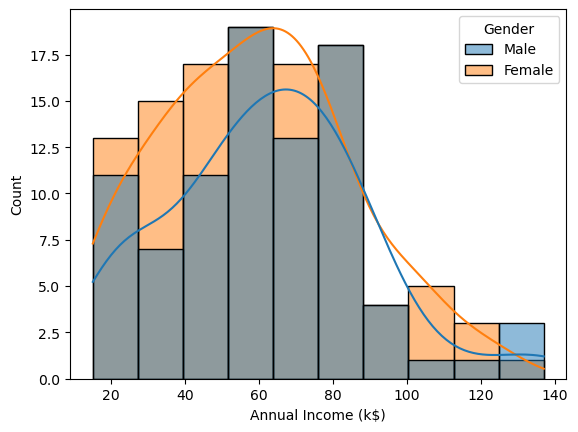

In [9]:
sns.histplot(data=df, x="Annual Income (k$)", bins=10,kde=True,hue='Gender')

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Density'>

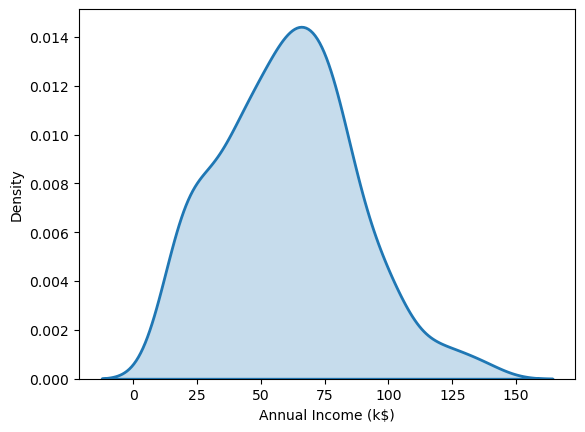

In [10]:
sns.kdeplot(data=df, x="Annual Income (k$)", linewidth = 2, fill=True)

### Analyze the spending scores of customers and examine the outliers count using a box plot

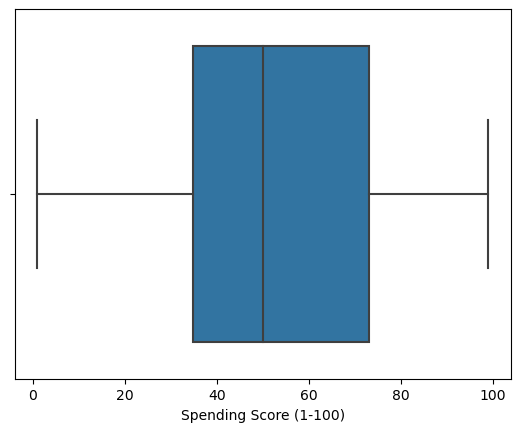

In [11]:
sns.boxplot(x='Spending Score (1-100)', data=df)
plt.show()

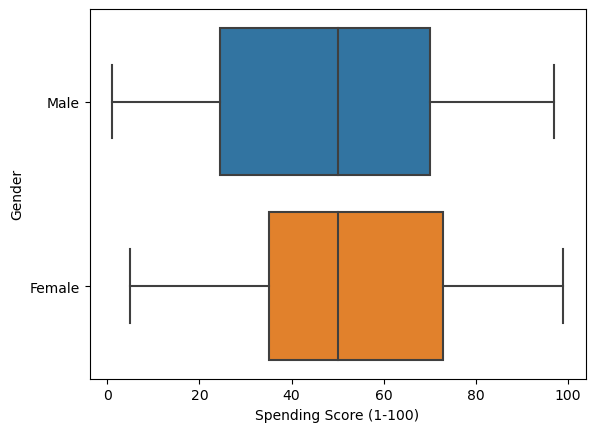

In [12]:
sns.boxplot(x='Spending Score (1-100)', y='Gender', data=df)
plt.show()

### Use K-means clustering and find optimal number of clusters to segment the dataset on the basis of customer spending score and salaries (annual income).

C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


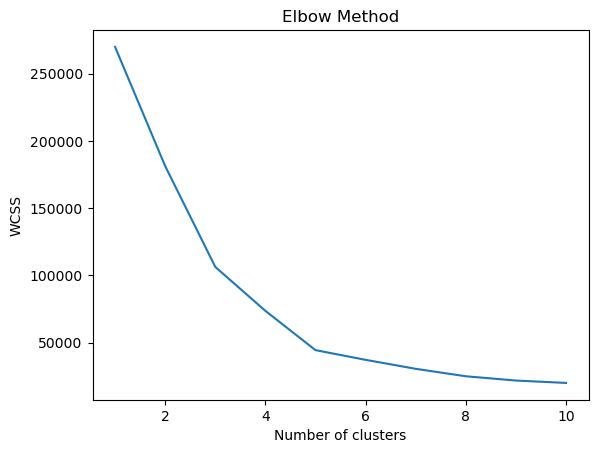

In [13]:
from sklearn.cluster import KMeans
X = df.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state = 2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

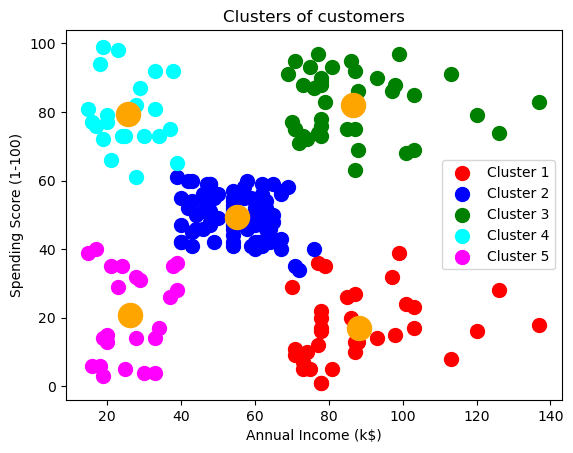

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'orange')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()